In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
# loading dataset.
df = pd.read_csv(r'../data/CPD_Reported_Shootings_20250710.csv')

# checking data integrity
df.info()

print('Null Values:', df.isnull().values.any())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   District                        1286 non-null   object 
 1   StreetBlock                     1283 non-null   object 
 2   LATITUDE_X                      1273 non-null   float64
 3   LONGITUDE_X                     1273 non-null   float64
 4   SNA_NEIGHBORHOOD                1269 non-null   object 
 5   ShootID                         1286 non-null   int64  
 6   RMS_No                          1286 non-null   object 
 7   Race                            1286 non-null   object 
 8   Sex                             1286 non-null   object 
 9   Age                             1286 non-null   int64  
 10  Type                            1286 non-null   object 
 11  YearOccurred                    1286 non-null   int64  
 12  DateOccurred                    12

In [73]:
# remove all rows with a null value
df_clean = df.dropna()
print(df_clean.isnull().sum())

District                          0
StreetBlock                       0
LATITUDE_X                        0
LONGITUDE_X                       0
SNA_NEIGHBORHOOD                  0
ShootID                           0
RMS_No                            0
Race                              0
Sex                               0
Age                               0
Type                              0
YearOccurred                      0
DateOccurred                      0
TimeOccurred                      0
DateTimeOccured                   0
COMMUNITY_COUNCIL_NEIGHBORHOOD    0
dtype: int64


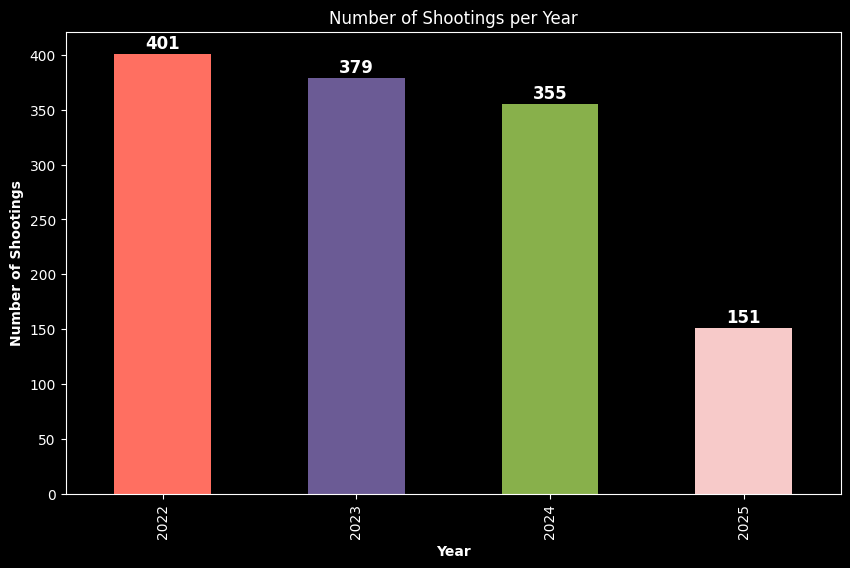

In [74]:
# Group by year and count the sum of shootings per year
shootings_per_year = df.groupby('YearOccurred').size()

plt.style.use('dark_background')
colors = ['#ff6f61', '#6b5b95', '#88b04b', '#f7cac9']

ax = shootings_per_year.plot(
    kind ='bar',
    figsize = (10,6),
    color = colors,
    title = 'Number of Shootings per Year'
)

# plot sum ontop of bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2, # x position: center of the bar
        p.get_height() + 5, # y position: a little above the bar
        int(p.get_height()), # text: the height value as int
        ha='center', # horizontal alignment
        color='white',
        fontsize=12,
        fontweight='bold'
    )
    
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.show()

Total shootings in 2022: 401


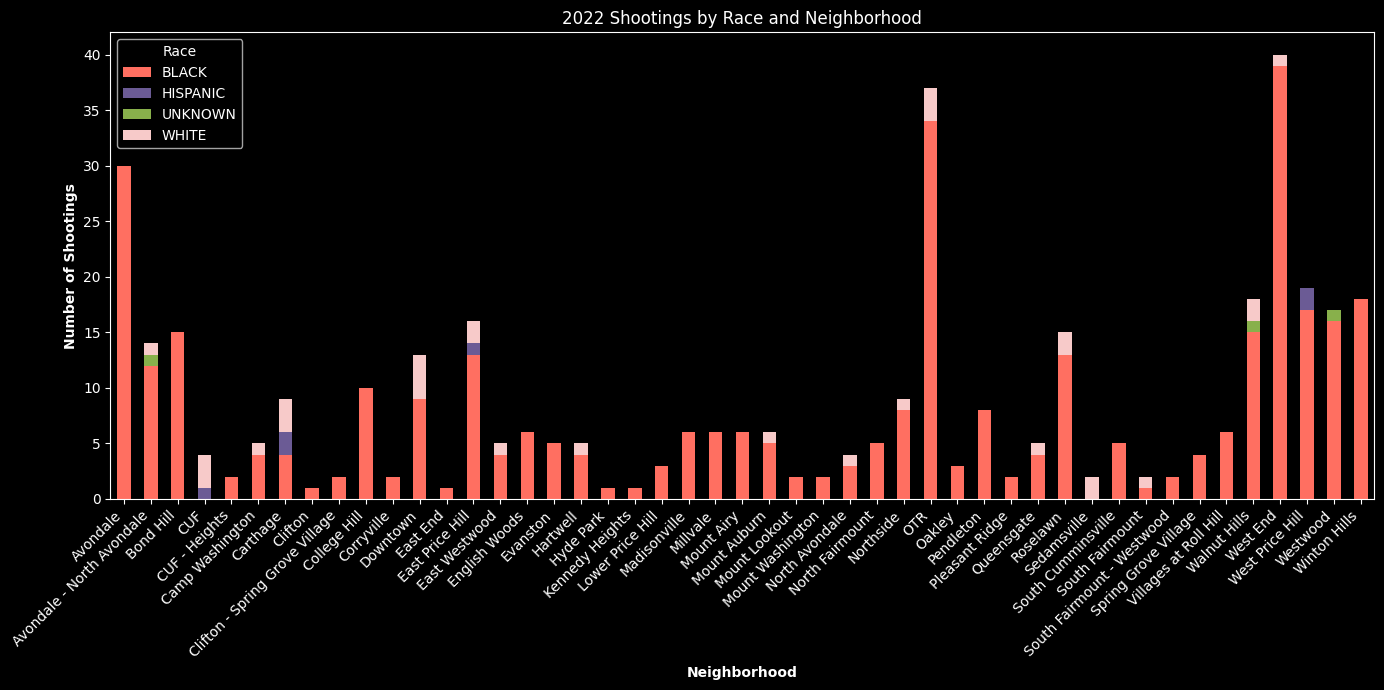

Shootings per 100,000 residents in Cincinnati in 2022: 128.90
Average shootings per day:  1.10


In [75]:
# looking at 2022 shootings
# filtering for 2022 only!
df_2022 = df[df['YearOccurred'] == 2022]
print(f"Total shootings in 2022: {len(df_2022)}")

# group by race and neighborhood
race_neighborhood_2022 = df_2022.groupby(['Race', 
                                          'COMMUNITY_COUNCIL_NEIGHBORHOOD']).size().unstack(fill_value=0)

# visualize
race_neighborhood_2022.T.plot(
    kind = 'bar',
    stacked=True,
    figsize=(14,7),
    color = colors,
    title = '2022 Shootings by Race and Neighborhood'
)

plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Number of Shootings', fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# total shootings in Cincinnati 2022 per 100,000 residents
total_shootings = df_2022.shape[0]
city_population = 311097

shootings_per_100k = (total_shootings / city_population) * 100000
print(f'Shootings per 100,000 residents in Cincinnati in 2022: {shootings_per_100k:.2f}')

# sum of shootings per day
total_shootings_per_year = 401
shootings_per_day = total_shootings_per_year / 365
print(f'Average shootings per day: {shootings_per_day: .2f}')

In [76]:
# show a text version of results
print("2022 Shootings by Race and Neighborhood:\n")
print(race_neighborhood_2022)

2022 Shootings by Race and Neighborhood:

COMMUNITY_COUNCIL_NEIGHBORHOOD  Avondale  Avondale - North Avondale  \
Race                                                                  
BLACK                                 30                         12   
HISPANIC                               0                          0   
UNKNOWN                                0                          1   
WHITE                                  0                          1   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Bond Hill  CUF  CUF - Heights  \
Race                                                            
BLACK                                  15    0              2   
HISPANIC                                0    1              0   
UNKNOWN                                 0    0              0   
WHITE                                   0    3              0   

COMMUNITY_COUNCIL_NEIGHBORHOOD  Camp Washington  Carthage  Clifton  \
Race                                                                 


In [77]:
# Define age bins and labels
bins = [0, 17, 25, 32, 39, 46, 53, 60, 150]
labels = ['<18', '18-25', '26-32', '33-39', '40-46', '47-53', '54-60', '60+']

# Bin the Age column
df_2022.loc[:,'AgeRange'] = pd.cut(df_2022['Age'], bins=bins, labels=labels, right=True)

# Group by AgeRange, Sex, Race, and Type
result = df_2022.groupby(['AgeRange', 'Sex', 'Race', 'Type']).size().reset_index(name='Count')

# Show the grouped result
print(result)

    AgeRange     Sex      Race      Type  Count
0        <18  FEMALE     BLACK     FATAL      2
1        <18  FEMALE     BLACK  NONFATAL      5
2        <18  FEMALE  HISPANIC     FATAL      0
3        <18  FEMALE  HISPANIC  NONFATAL      0
4        <18  FEMALE   UNKNOWN     FATAL      0
..       ...     ...       ...       ...    ...
123      60+    MALE  HISPANIC  NONFATAL      0
124      60+    MALE   UNKNOWN     FATAL      0
125      60+    MALE   UNKNOWN  NONFATAL      0
126      60+    MALE     WHITE     FATAL      0
127      60+    MALE     WHITE  NONFATAL      1

[128 rows x 5 columns]


C:\Users\WanDr\AppData\Local\Temp\ipykernel_8308\145576125.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.loc[:,'AgeRange'] = pd.cut(df_2022['Age'], bins=bins, labels=labels, right=True)
C:\Users\WanDr\AppData\Local\Temp\ipykernel_8308\145576125.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = df_2022.groupby(['AgeRange', 'Sex', 'Race', 'Type']).size().reset_index(name='Count')


C:\Users\WanDr\AppData\Local\Temp\ipykernel_8308\672998246.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_result = result.groupby(['AgeRange', 'Race'])['Count'].sum().reset_index()


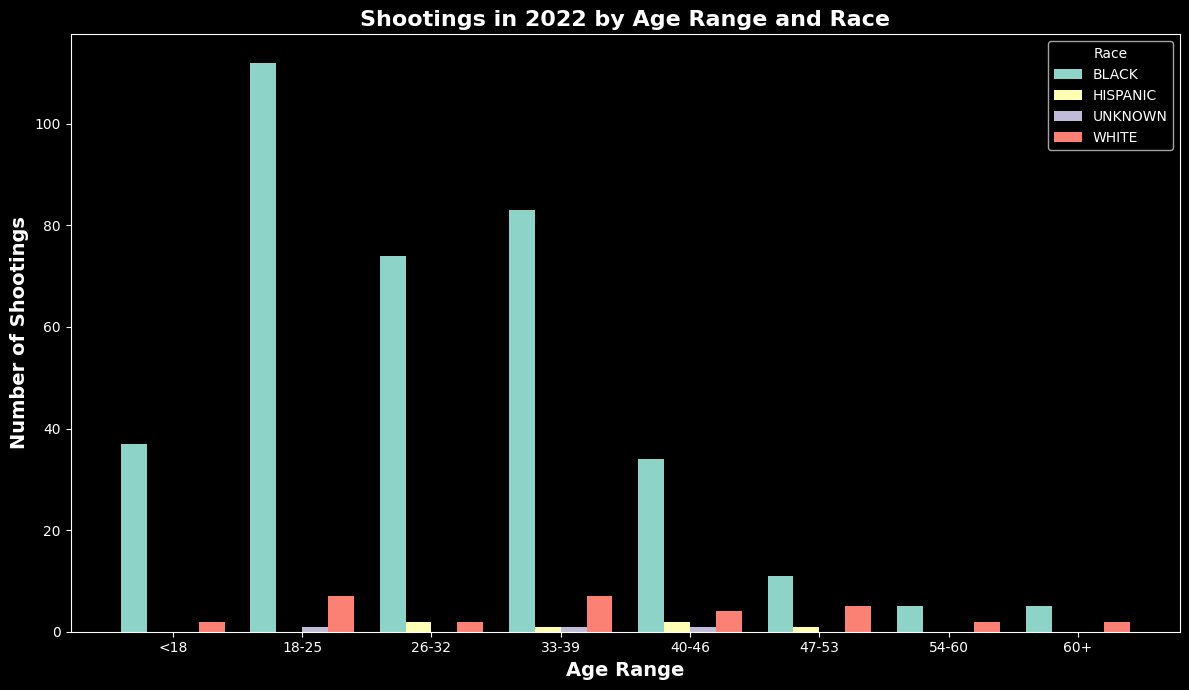

In [80]:
# Aggregate counts by AgeRange and Race only (sum over Sex and Type)
agg_result = result.groupby(['AgeRange', 'Race'])['Count'].sum().reset_index()

# Now pivot safely
pivot_df = agg_result.pivot(index='AgeRange', columns='Race', values='Count').fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Number of bars per group and bar width
n_groups = len(pivot_df.index)
n_bars = len(pivot_df.columns)
bar_width = 0.8 / n_bars # total width split among bars

# Positions of groups on x-axis
indices = np.arange(n_groups)

# Plot each race's bars
for i, race in enumerate(pivot_df.columns):
    ax.bar(indices + i*bar_width, pivot_df[race], width=bar_width, label=race)

# Labels and title
ax.set_xlabel('Age Range', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Shootings', fontsize=14, fontweight='bold')
ax.set_title('Shootings in 2022 by Age Range and Race', fontsize=16, fontweight='bold')

# X-ticks in the middle of grouped bars
ax.set_xticks(indices + bar_width * (n_bars - 1) / 2)
ax.set_xticklabels(pivot_df.index)

# Legend
ax.legend(title='Race')

plt.tight_layout()
plt.show()
